# make dataframes out of tsv

In [21]:
import pandas as pd 
import numpy as np 
import scipy
from matplotlib.colors import ListedColormap
import scikit_posthocs
import statannot
import scikit_posthocs as sp
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [24]:
plate_df = pd.read_csv('Objects_Population - Nonborder cells.txt', sep='\t')
plate_df

working_df = plate_df[['Cell Type',
                       'Nonborder cells - EdU/Hoechst ratio',
                       'Nonborder cells - p-H3 S10 to Hoechst intensity ratio']]

working_df.head(3)

,Cell Type,Nonborder cells - EdU/Hoechst ratio,Nonborder cells - p-H3 S10 to Hoechst intensity ratio
0,WT2_LACZ_1,0.381765,0.516552
1,WT2_LACZ_1,0.425830,0.597195
2,WT2_LACZ_1,0.502369,0.574262


In [25]:
wtlacz1sizedist_df = working_df.loc[(working_df['Cell Type']=='WT2_LACZ_1')]
mutlacz1sizedist_df = working_df.loc[(working_df['Cell Type']=='MUT2_LACZ_1')]
wtkv121sizedist_df = working_df.loc[(working_df['Cell Type']=='WT2_Kv12_1')] 
mutkv121sizedist_df = working_df.loc[(working_df['Cell Type']=='MUT2_Kv12_1')]

wtlacz2sizedist_df = working_df.loc[(working_df['Cell Type']=='WT2_LACZ_2')]
mutlacz2sizedist_df = working_df.loc[(working_df['Cell Type']=='MUT2_LACZ_2')]
wtkv122sizedist_df = working_df.loc[(working_df['Cell Type']=='WT2_Kv12_2')] 
mutkv122sizedist_df = working_df.loc[(working_df['Cell Type']=='MUT2_Kv12_2')]

#concat 1 and 2 of same genotype together (1 and 2 just refers to different seeding densities used)

#wt lacz
wtlaczconcat = [wtlacz1sizedist_df, wtlacz2sizedist_df]
wtlacz_df = pd.concat(wtlaczconcat)
#add genotype tag
wtlacz_df['Genotype'] = 'U2AF1 WT LacZ'

#mutlacz
mutlaczconcat = [mutlacz1sizedist_df, mutlacz2sizedist_df]
mutlacz_df = pd.concat(mutlaczconcat)
#add genotype tag for plotting
mutlacz_df['Genotype'] = 'U2AF1 S34F LacZ'

#wt kv12
wtkv12concat = [wtkv121sizedist_df, wtkv122sizedist_df]
wtkv12_df = pd.concat(wtkv12concat)
#add genotype tag
wtkv12_df['Genotype'] = 'U2AF1 WT KRAS G12V'

#mut kv12
mutkv12concat = [mutkv121sizedist_df, mutkv122sizedist_df]
mutkv12_df = pd.concat(mutkv12concat)
#add genotype tag for plotting
mutkv12_df['Genotype'] = 'U2AF1 S34F KRAS G12V'

#make a list of all dfs for SEM calculation
allgenos = [wtlacz_df, mutlacz_df, wtkv12_df, mutkv12_df]

allgenos_df = pd.concat(allgenos)
allgenos_df.head()

,Cell Type,Nonborder cells - EdU/Hoechst ratio,Nonborder cells - p-H3 S10 to Hoechst intensity ratio,Genotype
0,WT2_LACZ_1,0.381765,0.516552,U2AF1 WT LacZ
1,WT2_LACZ_1,0.425830,0.597195,U2AF1 WT LacZ
2,WT2_LACZ_1,0.502369,0.574262,U2AF1 WT LacZ
3,WT2_LACZ_1,1.103890,0.917704,U2AF1 WT LacZ
4,WT2_LACZ_1,0.358522,0.488688,U2AF1 WT LacZ


# Create box plots of EdU and nuclear P-H3 per genotype

# plot EdU intensities

(0.15, 0.7)

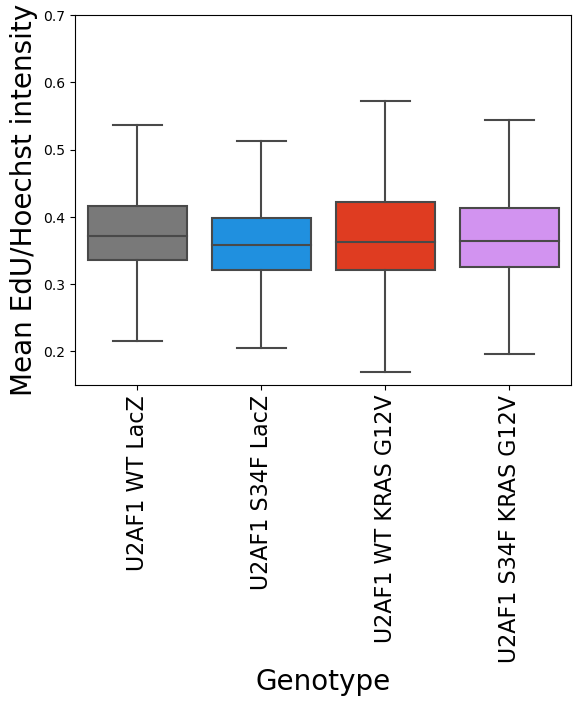

In [26]:
my_pal = {'U2AF1 WT LacZ': "#797979", 'U2AF1 S34F LacZ':'#0095FF', 'U2AF1 WT KRAS G12V':'#FF2501', "U2AF1 S34F KRAS G12V":"#D783FF", }
ax= sns.boxplot(data=allgenos_df, x='Genotype', y='Nonborder cells - EdU/Hoechst ratio', 
                palette=my_pal, showfliers=False)
ax.set_ylabel('Mean EdU/Hoechst intensity', fontsize=20)
ax.set_xlabel('Genotype', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=90)
ax.set_ylim([0.15, .7])
# plt.savefig("Downloads/edu_20240405.pdf", format='pdf', transparent=True)

# plot PHH3 intensities

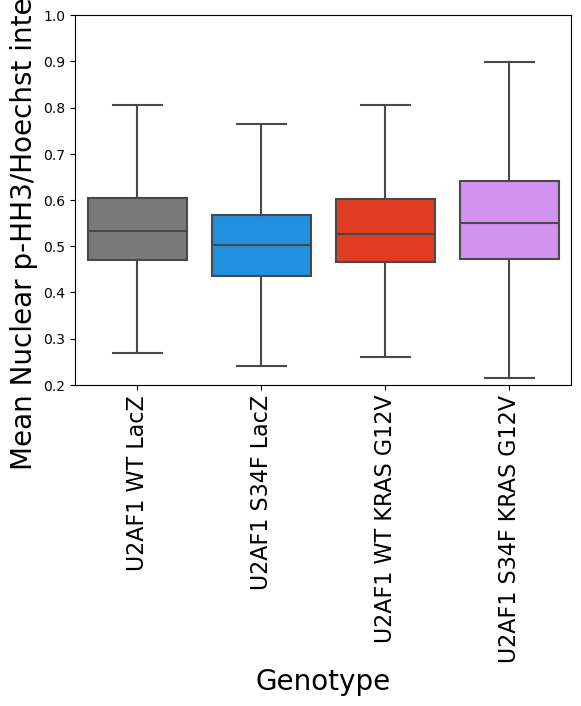

In [31]:
ax = sns.boxplot(data=allgenos_df, x='Genotype', y='Nonborder cells - p-H3 S10 to Hoechst intensity ratio', 
                 palette=my_pal, showfliers=False)
ax.set_ylabel('Mean Nuclear p-HH3/Hoechst intensity', fontsize=20)
ax.set_xlabel('Genotype', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=90)
ax.set_ylim([0.2, 1])
plt.savefig("Downloads/phh3_20240415.pdf", format='pdf', transparent=True)

# kruskal wallis + dunns posthoc on data

In [28]:
df=sp.posthoc_dunn(allgenos_df, val_col='Nonborder cells - EdU/Hoechst ratio',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

#significant pairs

#U2AF1 S34F LacZ vs. U2AF1 S34F KRAS G12V 0
#U2AF1 S34F KRAS G12V vs. U2AF1 WT LacZ 0
#U2AF1 WT KRAS G12V vs. U2AF1 S34F LacZ 0
#U2AF1 WT LACZ vs. U2AF1 S34F LacZ 0
#U2AF1 WT KRAS G12V vs. U2AF1 WT LacZ 0

,U2AF1 S34F KRAS G12V,U2AF1 S34F LacZ,U2AF1 WT KRAS G12V,U2AF1 WT LacZ
U2AF1 S34F KRAS G12V,1.0000,0.0,0.7027,0.0
U2AF1 S34F LacZ,0.0000,1.0,0.0000,0.0
U2AF1 WT KRAS G12V,0.7027,0.0,1.0000,0.0
U2AF1 WT LacZ,0.0000,0.0,0.0000,1.0


In [29]:
df=sp.posthoc_dunn(allgenos_df, val_col='Nonborder cells - p-H3 S10 to Hoechst intensity ratio',
                group_col='Genotype', p_adjust = 'bonferroni',sort=True)

df.round(5)

#sig pairs
#U2AF1 S34F LacZ vs. U2AF1 S34F KRAS G12V 0
#U2AF1 WT KRAS G12V vs. U2AF1 S34F KRAS G12V 0
#U2AF1 WT Lacz vs. U2AF1 S34F KRAS G12V 0
#U2AF1 WT KRAS G12V vs. U2AF1 S34F LacZ 0
#U2AF1 WT LACZ vs. U2AF1 S34F LacZ 0
#U2AF1 WT LACZ vs. U2AF1 WT KRAS G12V 0

,U2AF1 S34F KRAS G12V,U2AF1 S34F LacZ,U2AF1 WT KRAS G12V,U2AF1 WT LacZ
U2AF1 S34F KRAS G12V,1.0,0.0,0.0,0.0
U2AF1 S34F LacZ,0.0,1.0,0.0,0.0
U2AF1 WT KRAS G12V,0.0,0.0,1.0,0.0
U2AF1 WT LacZ,0.0,0.0,0.0,1.0


# make violin plot to see distributions of edu, phh3

[Text(0, 0, 'U2AF1 WT LacZ'),
 Text(1, 0, 'U2AF1 S34F LacZ'),
 Text(2, 0, 'U2AF1 WT KRAS G12V'),
 Text(3, 0, 'U2AF1 S34F KRAS G12V')]

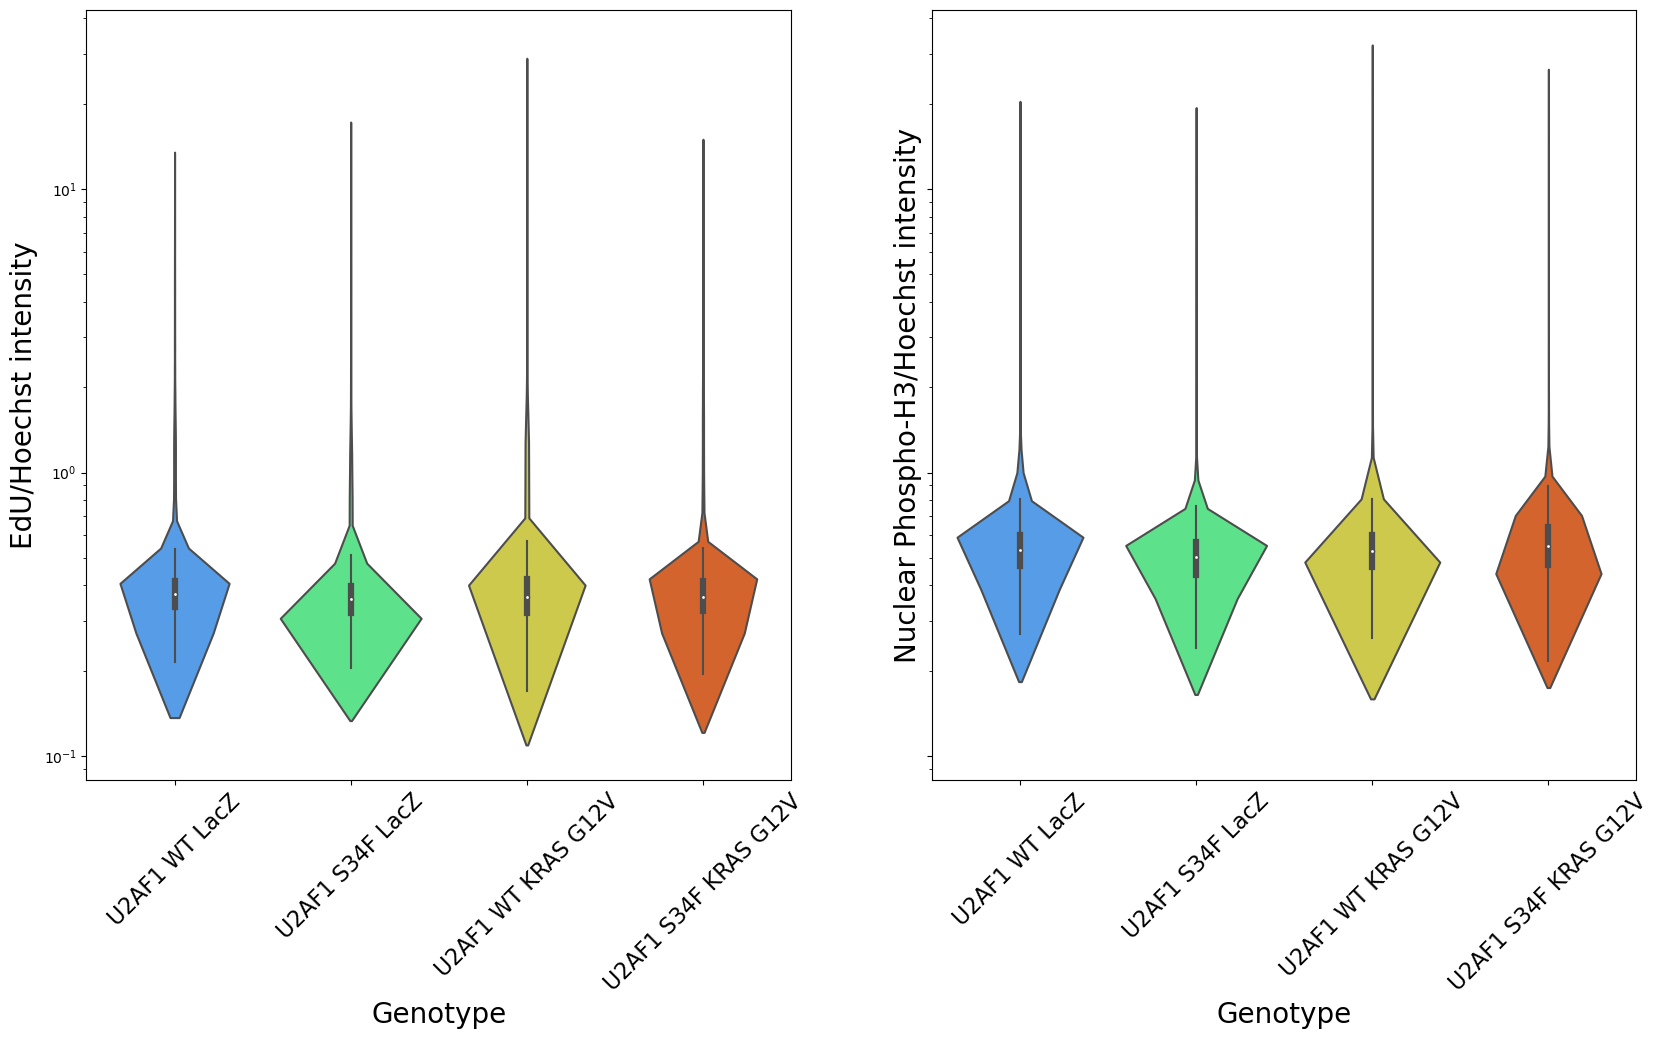

In [30]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20,10))

ax1=sns.violinplot(data=allgenos_df, ax=ax[0], x='Genotype', y='Nonborder cells - EdU/Hoechst ratio', 
                palette='turbo', inner='box', cut=0)

ax2=sns.violinplot(data=allgenos_df, ax=ax[1], x='Genotype', y='Nonborder cells - p-H3 S10 to Hoechst intensity ratio', 
               palette="turbo", inner='box', cut=0)

plt.yscale('log')

ax1.set_ylabel('EdU/Hoechst intensity', fontsize=20)
ax2.set_ylabel('Nuclear Phospho-H3/Hoechst intensity', fontsize=20)


ax1.set_xlabel('Genotype', fontsize=20)
ax2.set_xlabel('Genotype', fontsize=20)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16, rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=16, rotation=45)


### 